In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics as ms
import pandas as pd


# **Imbalanced**

## **UNET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/imbalanced_unet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,1.618240,0.092853,1.708813,-0.300145,-0.293024,-0.391979,0.160921,1.964600,-0.376930,-0.552599,-1.269133,0
1,0.983427,0.220914,0.929119,-0.370344,1.907411,-0.899602,-0.804028,1.260925,-0.912188,-0.249863,-1.772300,0
2,-0.603606,2.675414,-1.318233,1.138934,0.108642,-0.899602,-0.866283,-0.146424,1.883049,-0.703966,0.156505,0
3,0.983427,-0.504764,0.608069,-0.791537,0.946903,2.044612,0.192048,0.718090,0.396221,0.910624,-0.514383,0
4,-0.127496,1.971079,-1.226505,0.542243,-0.118387,-0.798077,-0.959665,1.019665,0.990952,-0.956246,0.408089,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.709408,-0.974321,0.195290,-0.651139,-0.520053,-1.102651,-0.897410,-0.447999,-0.495876,2.121566,-0.430522,5
1186,-0.709408,-0.760886,0.103561,-0.440543,-0.607372,0.115644,-0.399372,-1.091359,-0.495876,0.406064,0.659672,5
1187,-0.603606,-0.846260,0.057697,-0.580940,-0.293024,0.318693,-0.555009,-1.357750,-0.436403,0.103329,0.743533,5
1188,-0.339100,-0.888947,0.791526,0.682640,-0.223169,0.115644,-0.150353,0.205413,0.217802,0.910624,1.917589,5


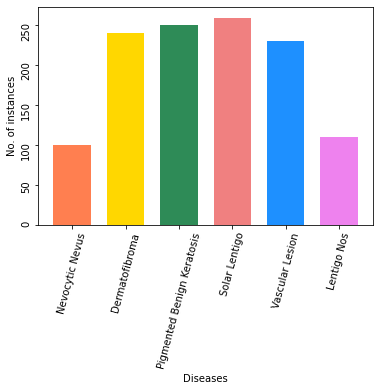

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_unet=df['label']
df_unet_imbal_final = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_unet_imbal_final, label_unet ,
                                                    test_size=0.225, random_state=44)

print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')

Training on  952  images
Testing on  237  images


### Random Forest

Accuracy: 0.9029535864978903
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99        41
            Dermatofibroma       0.90      1.00      0.95        44
Pigmented Benign Keratosis       0.80      0.90      0.85        49
             Solar Lentigo       0.85      0.68      0.76        41
           Vascular Lesion       0.96      0.81      0.88        27
               Lentigo Nos       1.00      1.00      1.00        35

                  accuracy                           0.90       237
                 macro avg       0.91      0.90      0.90       237
              weighted avg       0.90      0.90      0.90       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


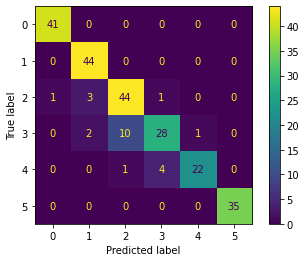

In [30]:

rf = RandomForestClassifier(n_estimators=2,random_state=644)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test )
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  
 

### SVC

Accuracy: 0.8481012658227848
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.93      1.00      0.96        41
            Dermatofibroma       0.89      0.93      0.91        44
Pigmented Benign Keratosis       0.88      0.76      0.81        49
             Solar Lentigo       0.74      0.71      0.72        41
           Vascular Lesion       0.72      0.67      0.69        27
               Lentigo Nos       0.85      1.00      0.92        35

                  accuracy                           0.85       237
                 macro avg       0.84      0.84      0.84       237
              weighted avg       0.85      0.85      0.84       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


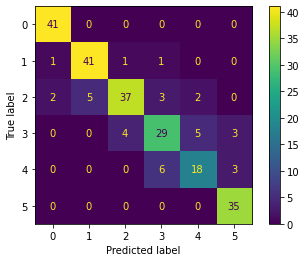

In [41]:

svc= SVC(gamma='auto',C=3.0,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.8734177215189873
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.95      1.00      0.98        41
            Dermatofibroma       0.88      0.98      0.92        44
Pigmented Benign Keratosis       0.90      0.78      0.84        49
             Solar Lentigo       0.76      0.68      0.72        41
           Vascular Lesion       0.79      0.81      0.80        27
               Lentigo Nos       0.92      1.00      0.96        35

                  accuracy                           0.87       237
                 macro avg       0.87      0.88      0.87       237
              weighted avg       0.87      0.87      0.87       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


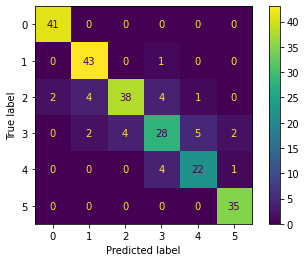

In [ ]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.6075949367088608
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.59      0.93      0.72        41
            Dermatofibroma       0.70      0.48      0.57        44
Pigmented Benign Keratosis       0.64      0.59      0.62        49
             Solar Lentigo       0.64      0.39      0.48        41
           Vascular Lesion       0.45      0.33      0.38        27
               Lentigo Nos       0.58      0.89      0.70        35

                  accuracy                           0.61       237
                 macro avg       0.60      0.60      0.58       237
              weighted avg       0.61      0.61      0.59       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


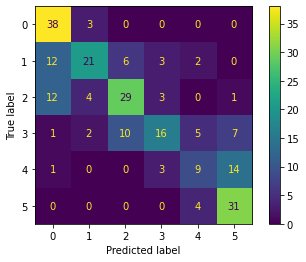

In [62]:

bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  

### Ensemble

Accuracy: 0.9240506329113924
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.95      1.00      0.98        41
            Dermatofibroma       0.94      1.00      0.97        44
Pigmented Benign Keratosis       0.85      0.92      0.88        49
             Solar Lentigo       0.88      0.71      0.78        41
           Vascular Lesion       1.00      0.93      0.96        27
               Lentigo Nos       0.97      1.00      0.99        35

                  accuracy                           0.92       237
                 macro avg       0.93      0.93      0.93       237
              weighted avg       0.92      0.92      0.92       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


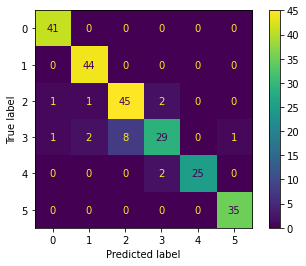

In [64]:

clf1 = tree.DecisionTreeClassifier(random_state=30, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  



## **ResNet**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/imbalanced_resnet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df=df.drop(columns=df.columns[0],axis=1)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,-0.127496,1.971079,-1.226505,0.542243,-0.118387,-0.798077,-0.959665,1.019665,0.990952,-0.956246,0.408089,0
1,1.565339,-1.614625,1.020848,0.963436,0.230889,-1.001127,-0.586136,1.361450,-0.198510,1.465639,-0.346661,3
2,-0.550705,0.541066,-0.997183,-0.089548,-0.572445,-0.899602,-1.021920,-0.287159,0.396221,-0.653510,0.324228,1
3,-1.026815,0.220914,-1.318233,-0.721338,-0.380343,-1.001127,-1.053047,-1.473354,0.098855,-1.561717,-0.095078,1
4,0.983427,-0.632825,1.204305,0.401845,-0.258097,0.826317,0.378812,1.361450,-0.971661,1.061991,-0.514383,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.868111,-0.163269,-0.171625,-0.019349,-0.170778,-0.391979,-0.150353,-0.020768,0.872006,-0.905790,0.408089,2
1186,0.031207,-0.760886,0.332883,0.261447,-0.170778,1.638514,2.402092,0.054626,-0.674295,-0.603054,-0.933689,2
1187,-0.709408,0.306288,-1.318233,-0.510742,0.108642,0.014120,-0.119226,-0.071031,0.336748,-0.502143,-1.269133,3
1188,0.877625,-0.931634,0.883255,-0.370344,-0.677227,-0.899602,-1.021920,-1.161727,-0.674295,0.052873,1.330561,4


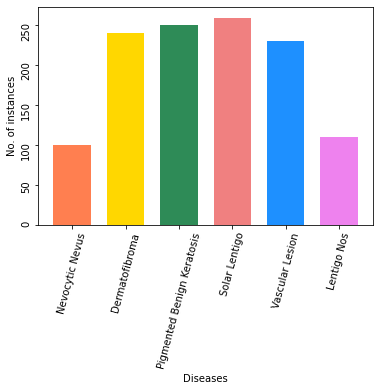

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_segnet_imbal=df['label']
df_segnet_imbal_final = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_segnet_imbal_final, label_segnet_imbal ,
                                                    test_size=0.225, random_state=44)
 
 
print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')

Training on  952  images
Testing on  237  images


### Random Forest


Accuracy: 0.8818565400843882
                            precision    recall  f1-score   support

            Dermatofibroma       1.00      1.00      1.00        41
Pigmented Benign Keratosis       0.86      1.00      0.93        44
             Solar Lentigo       0.90      0.78      0.84        49
           Vascular Lesion       0.78      0.71      0.74        41
           Nevocytic Nevus       0.79      0.81      0.80        27
               Lentigo Nos       0.92      1.00      0.96        35

                  accuracy                           0.88       237
                 macro avg       0.88      0.88      0.88       237
              weighted avg       0.88      0.88      0.88       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


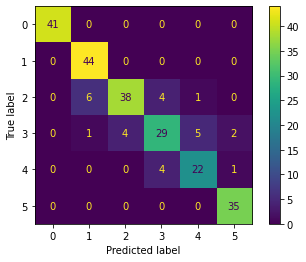

In [ ]:

rf = RandomForestClassifier(n_estimators=30,random_state=77)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test )
predictions=np.round(predictions)

target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  
 

### SVC

Accuracy: 0.8227848101265823
                            precision    recall  f1-score   support

            Dermatofibroma       0.85      1.00      0.92        41
Pigmented Benign Keratosis       0.88      0.86      0.87        44
             Solar Lentigo       0.84      0.76      0.80        49
           Vascular Lesion       0.72      0.63      0.68        41
           Nevocytic Nevus       0.72      0.67      0.69        27
               Lentigo Nos       0.85      1.00      0.92        35

                  accuracy                           0.82       237
                 macro avg       0.81      0.82      0.81       237
              weighted avg       0.82      0.82      0.82       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


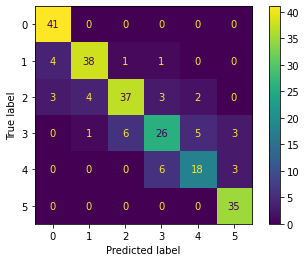

In [ ]:

svc= SVC(gamma='auto',C=1.4,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

Accuracy: 0.8143459915611815
                            precision    recall  f1-score   support

            Dermatofibroma       0.85      1.00      0.92        41
Pigmented Benign Keratosis       0.86      0.86      0.86        44
             Solar Lentigo       0.86      0.76      0.80        49
           Vascular Lesion       0.69      0.61      0.65        41
           Nevocytic Nevus       0.71      0.63      0.67        27
               Lentigo Nos       0.83      1.00      0.91        35

                  accuracy                           0.81       237
                 macro avg       0.80      0.81      0.80       237
              weighted avg       0.81      0.81      0.81       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


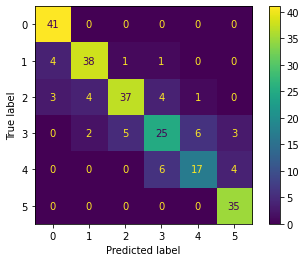

In [128]:

svc= SVC(gamma='auto',C=1.2,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.8438818565400844
                            precision    recall  f1-score   support

            Dermatofibroma       0.91      1.00      0.95        41
Pigmented Benign Keratosis       0.89      0.91      0.90        44
             Solar Lentigo       0.86      0.76      0.80        49
           Vascular Lesion       0.74      0.71      0.72        41
           Nevocytic Nevus       0.75      0.67      0.71        27
               Lentigo Nos       0.85      1.00      0.92        35

                  accuracy                           0.84       237
                 macro avg       0.83      0.84      0.83       237
              weighted avg       0.84      0.84      0.84       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


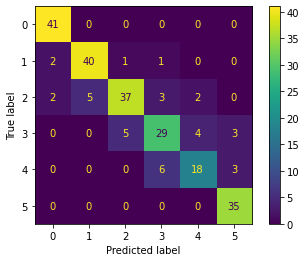

In [131]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

 
predictions = dt.predict(X_test )
predictions=np.round(predictions)


target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.5949367088607594
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.58      0.76      0.66        41
            Dermatofibroma       0.64      0.52      0.57        44
Pigmented Benign Keratosis       0.67      0.63      0.65        49
             Solar Lentigo       0.54      0.34      0.42        41
           Vascular Lesion       0.64      0.26      0.37        27
               Lentigo Nos       0.54      1.00      0.70        35

                  accuracy                           0.59       237
                 macro avg       0.60      0.59      0.56       237
              weighted avg       0.60      0.59      0.57       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


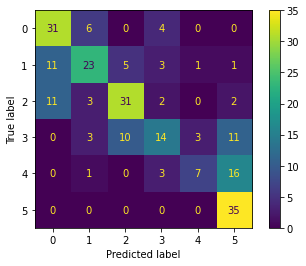

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)
# predictions=np.round(predictions)

target_names =['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  

### Ensemble

Accuracy: 0.9029535864978903
                            precision    recall  f1-score   support

            Dermatofibroma       1.00      1.00      1.00        41
Pigmented Benign Keratosis       0.92      1.00      0.96        44
             Solar Lentigo       0.87      0.82      0.84        49
           Vascular Lesion       0.81      0.73      0.77        41
           Nevocytic Nevus       0.89      0.89      0.89        27
               Lentigo Nos       0.92      1.00      0.96        35

                  accuracy                           0.90       237
                 macro avg       0.90      0.91      0.90       237
              weighted avg       0.90      0.90      0.90       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


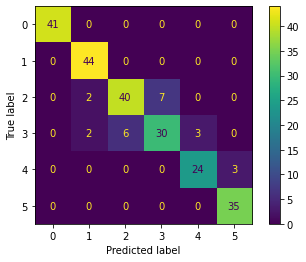

In [101]:


clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
# predictions = eclf1.predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  

## **SegNet**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/imbalanced_segnet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df=df.drop(columns=df.columns[0],axis=1)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,0.983427,-0.504764,0.608069,-0.791537,0.946903,2.044612,0.192048,0.718090,0.396221,0.910624,-0.514383,0
1,-0.603606,0.135540,-0.951319,1.244232,-0.083459,-0.798077,-0.399372,0.255676,0.396221,-0.905790,-1.269133,1
2,-0.550705,-0.120582,-1.043047,-0.019349,-0.083459,0.623267,0.067539,-0.196687,0.396221,-0.451687,0.156505,3
3,-1.555826,1.245401,-1.088912,-0.861736,-0.799474,-0.188930,1.437143,-2.257449,1.466737,0.708800,2.001450,5
4,0.189910,0.135540,0.974983,-0.440543,4.299947,1.333940,1.219251,-0.246949,-1.625866,4.694819,-0.849828,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.921013,1.095997,-1.318233,-1.002134,3.077483,0.217169,-0.399372,-1.096385,0.039382,-0.855334,-0.598244,0
1186,-0.815210,1.053310,-1.318233,-0.089548,-0.397807,-0.696553,-0.679518,0.004363,0.990952,-0.603054,-0.765967,2
1187,-1.291320,-0.675512,-0.584404,-0.580940,-0.380343,-0.290454,-0.523882,-0.699312,0.634114,0.305152,-0.346661,4
1188,-0.392002,0.348975,-0.859590,2.367415,0.422990,-0.899602,-0.959665,0.758300,0.336748,0.052873,-0.346661,4


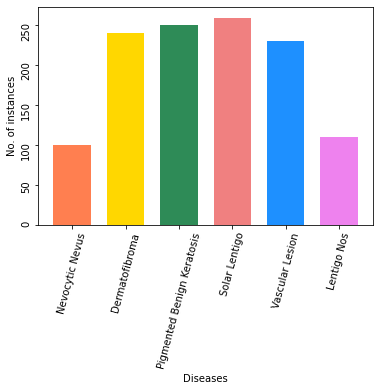

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_resnet=df['label']
df_resnet_imbal_final = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_resnet_imbal_final, label_resnet ,
                                                    test_size=0.22, random_state=44)
 

print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')

Training on  952  images
Testing on  237  images


### Random Forest

Accuracy: 0.8523206751054853
                            precision    recall  f1-score   support

            Dermatofibroma       0.93      1.00      0.96        41
Pigmented Benign Keratosis       0.87      0.93      0.90        44
             Solar Lentigo       0.88      0.78      0.83        49
           Vascular Lesion       0.75      0.66      0.70        41
           Nevocytic Nevus       0.74      0.74      0.74        27
               Lentigo Nos       0.88      1.00      0.93        35

                  accuracy                           0.85       237
                 macro avg       0.84      0.85      0.84       237
              weighted avg       0.85      0.85      0.85       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


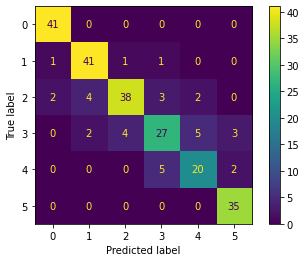

In [141]:

rf = RandomForestClassifier(n_estimators=30,random_state=77)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test )
predictions=np.round(predictions)

target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  
 

### SVC

Accuracy: 0.810126582278481
                            precision    recall  f1-score   support

            Dermatofibroma       0.85      1.00      0.92        41
Pigmented Benign Keratosis       0.86      0.86      0.86        44
             Solar Lentigo       0.84      0.76      0.80        49
           Vascular Lesion       0.69      0.61      0.65        41
           Nevocytic Nevus       0.73      0.59      0.65        27
               Lentigo Nos       0.81      1.00      0.90        35

                  accuracy                           0.81       237
                 macro avg       0.80      0.80      0.80       237
              weighted avg       0.81      0.81      0.80       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


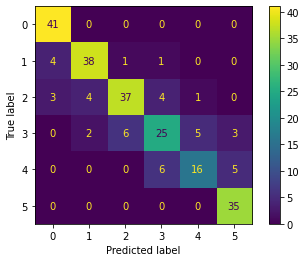

In [ ]:

svc= SVC(gamma='auto',C=4.0,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.8270042194092827
                            precision    recall  f1-score   support

            Dermatofibroma       1.00      1.00      1.00        41
Pigmented Benign Keratosis       0.78      0.89      0.83        44
             Solar Lentigo       0.79      0.76      0.77        49
           Vascular Lesion       0.62      0.59      0.60        41
           Nevocytic Nevus       0.87      0.74      0.80        27
               Lentigo Nos       0.95      1.00      0.97        35

                  accuracy                           0.83       237
                 macro avg       0.83      0.83      0.83       237
              weighted avg       0.83      0.83      0.82       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


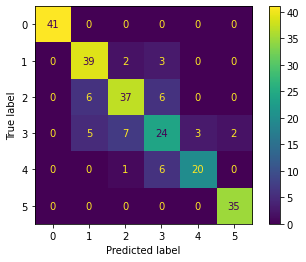

In [ ]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

 
predictions = dt.predict(X_test )
predictions=np.round(predictions)


target_names = ['Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Nevocytic Nevus','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.5527426160337553
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.52      0.80      0.63        41
            Dermatofibroma       0.75      0.27      0.40        44
Pigmented Benign Keratosis       0.57      0.59      0.58        49
             Solar Lentigo       0.44      0.29      0.35        41
           Vascular Lesion       0.57      0.44      0.50        27
               Lentigo Nos       0.56      0.94      0.70        35

                  accuracy                           0.55       237
                 macro avg       0.57      0.56      0.53       237
              weighted avg       0.57      0.55      0.53       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


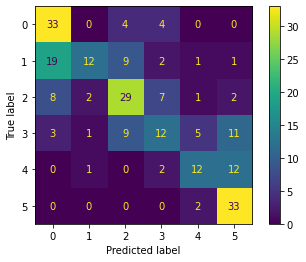

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  

 


### Ensemble

Accuracy: 0.8734177215189873
                            precision    recall  f1-score   support

            Dermatofibroma       0.95      1.00      0.98        41
Pigmented Benign Keratosis       0.88      0.98      0.92        44
             Solar Lentigo       0.90      0.78      0.84        49
           Vascular Lesion       0.76      0.68      0.72        41
           Nevocytic Nevus       0.79      0.81      0.80        27
               Lentigo Nos       0.92      1.00      0.96        35

                  accuracy                           0.87       237
                 macro avg       0.87      0.88      0.87       237
              weighted avg       0.87      0.87      0.87       237



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


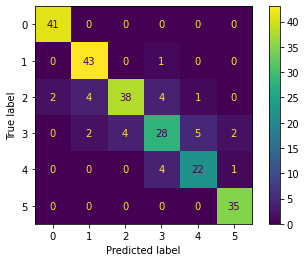

In [142]:

clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  

# **Balanced**

## **UNet**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/balanced_unet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,1.691917,0.012063,1.724320,-0.297655,-0.298154,-0.365587,0.300011,1.987654,-0.422459,-0.537124,-1.344391,0
1,1.045687,0.127153,0.953143,-0.370075,2.101425,-0.860468,-0.745674,1.321834,-0.951388,-0.199811,-1.816476,0
2,-0.569888,2.333036,-1.269661,1.186953,0.139865,-0.860468,-0.813137,-0.009807,1.810794,-0.705781,-0.006818,0
3,1.045687,-0.525021,0.635599,-0.804595,1.053990,2.009842,0.333743,0.808201,0.341548,1.093224,-0.636264,0
4,-0.085216,1.700044,-1.178935,0.571384,-0.107711,-0.761492,-0.914333,1.093552,0.929247,-0.986875,0.229224,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,0.507162,-1.062106,1.270686,0.136864,-0.183888,-0.761492,-0.711942,-0.104924,-1.010158,1.430537,0.779989,5
3006,1.207244,-0.870290,1.134596,-0.007976,-0.374331,-0.860468,-0.745674,0.275544,-1.010158,-0.087373,0.229224,5
3007,1.207244,-0.870290,1.134596,-0.007976,-0.374331,-0.860468,-0.745674,0.275544,-1.010158,-0.087373,0.229224,5
3008,-1.862348,-0.601748,-0.180941,-0.442495,-0.564774,0.525199,0.401206,-2.340179,2.339723,0.418597,2.589647,5


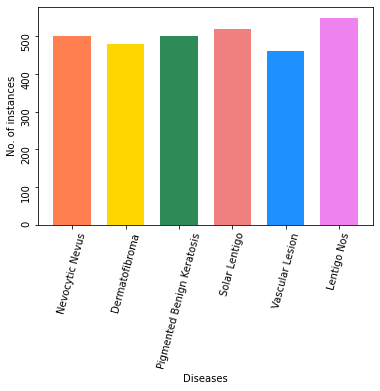

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_unet=df['label']
df_unet_final = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_unet_final, label_unet ,
                                                    test_size=0.225, random_state=44)
 
print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')


Training on  2332  images
Testing on  678  images


### Random Forest

Accuracy: 0.9660766961651918
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99       103
            Dermatofibroma       0.97      1.00      0.99       108
Pigmented Benign Keratosis       0.98      0.97      0.98       112
             Solar Lentigo       0.89      0.97      0.93       119
           Vascular Lesion       1.00      0.86      0.92       121
               Lentigo Nos       0.99      1.00      1.00       115

                  accuracy                           0.97       678
                 macro avg       0.97      0.97      0.97       678
              weighted avg       0.97      0.97      0.97       678



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


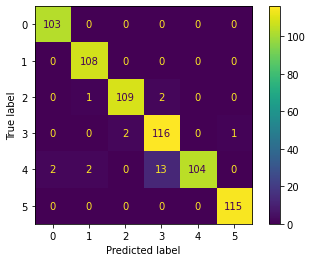

In [ ]:

rf = RandomForestClassifier(n_estimators=30,random_state=77)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test )
predictions=np.round(predictions)

target_names =  ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  
 

### SVC

Accuracy: 0.8864306784660767
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.99      1.00      1.00       111
            Dermatofibroma       0.88      1.00      0.94       104
Pigmented Benign Keratosis       0.86      0.78      0.82       117
             Solar Lentigo       0.72      0.74      0.73       116
           Vascular Lesion       0.92      0.82      0.87       114
               Lentigo Nos       0.96      1.00      0.98       116

                  accuracy                           0.89       678
                 macro avg       0.89      0.89      0.89       678
              weighted avg       0.89      0.89      0.89       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


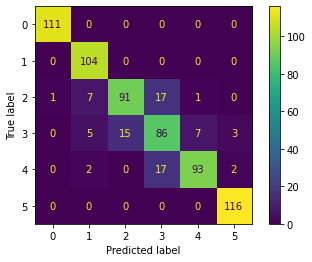

In [ ]:
svc= SVC(gamma='auto',C=4.0,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names =  ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.9351032448377581
                            precision    recall  f1-score   support

           Nevocytic Nevus       1.00      1.00      1.00       111
            Dermatofibroma       0.95      1.00      0.98       104
Pigmented Benign Keratosis       0.93      0.91      0.92       117
             Solar Lentigo       0.81      0.88      0.84       116
           Vascular Lesion       0.98      0.83      0.90       114
               Lentigo Nos       0.96      1.00      0.98       116

                  accuracy                           0.94       678
                 macro avg       0.94      0.94      0.94       678
              weighted avg       0.94      0.94      0.93       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


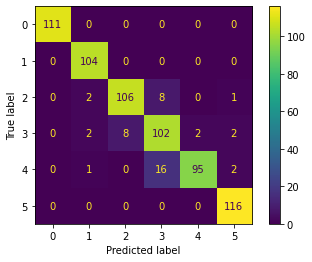

In [ ]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

 
predictions = dt.predict(X_test )
predictions=np.round(predictions)


target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.6356932153392331
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.88      1.00      0.94       111
            Dermatofibroma       0.82      0.32      0.46       104
Pigmented Benign Keratosis       0.54      0.62      0.58       117
             Solar Lentigo       0.31      0.30      0.30       116
           Vascular Lesion       0.64      0.55      0.59       114
               Lentigo Nos       0.70      1.00      0.83       116

                  accuracy                           0.64       678
                 macro avg       0.65      0.63      0.62       678
              weighted avg       0.64      0.64      0.62       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


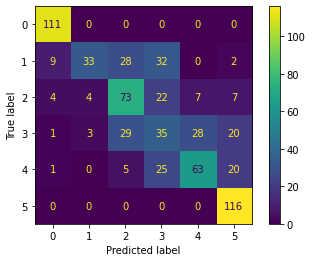

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)
# predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  

 


### Ensemble

Accuracy: 0.9852507374631269
                            precision    recall  f1-score   support

           Nevocytic Nevus       1.00      1.00      1.00       111
            Dermatofibroma       0.99      1.00      1.00       104
Pigmented Benign Keratosis       0.96      0.98      0.97       117
             Solar Lentigo       0.98      0.94      0.96       116
           Vascular Lesion       0.98      0.99      0.99       114
               Lentigo Nos       1.00      1.00      1.00       116

                  accuracy                           0.99       678
                 macro avg       0.99      0.99      0.99       678
              weighted avg       0.99      0.99      0.99       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


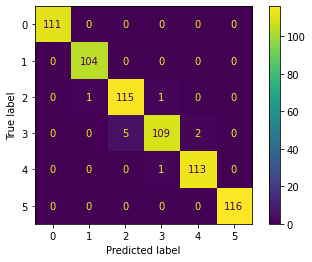

In [ ]:

clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
# predictions = eclf1.predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  

## **ResNet**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/balanced_resnet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,-0.946856,0.702601,-1.178935,-0.587335,-0.221977,-0.761492,-0.880601,-0.295159,1.340636,-0.199811,-0.596924,0
1,2.230442,-0.755200,1.724320,-0.007976,-0.031534,-0.365587,0.097620,2.082771,-0.892618,0.081284,-0.714945,3
2,0.184047,-1.177195,0.499509,-0.442495,0.196998,0.624175,-0.374624,-0.551975,-1.010158,0.137503,0.386586,3
3,-0.085216,1.700044,-1.178935,0.571384,-0.107711,-0.761492,-0.914333,1.093552,0.929247,-0.986875,0.229224,0
4,0.345604,-0.218116,0.227329,-0.949435,-0.374331,-0.464563,-0.273429,0.560896,-0.481229,-0.368467,-1.108349,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,0.668719,-0.179753,1.452139,-0.442495,-0.964703,-0.860468,-0.644479,-0.366497,-0.128610,1.093224,1.330755,3
3006,-0.462183,3.848382,-1.269661,-0.370075,0.901636,-0.860468,-0.981796,-0.884885,1.046786,-1.492845,0.150543,0
3007,-0.893003,0.913598,-1.269661,-1.021855,3.377392,0.228270,-0.307161,-0.908665,-0.011071,-0.874437,-0.714945,0
3008,0.830277,-1.215559,1.179959,-0.514915,-0.126755,2.801652,1.210769,-1.003782,-2.009245,-0.199811,0.858670,5


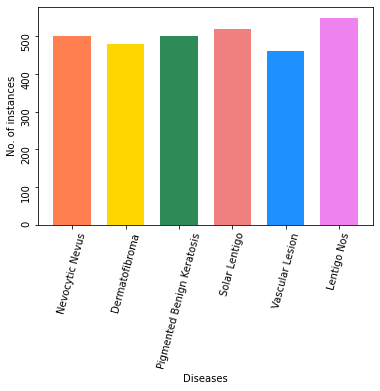

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_resnet=df['label']
df_resnet_bal = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_resnet_bal, label_resnet ,
                                                    test_size=0.225, random_state=44)

print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')


 

Training on  2332  images
Testing on  678  images


### RF

Accuracy: 0.9100294985250738
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99       111
            Dermatofibroma       0.87      1.00      0.93       104
Pigmented Benign Keratosis       0.91      0.82      0.86       117
             Solar Lentigo       0.81      0.84      0.82       116
           Vascular Lesion       0.93      0.82      0.87       114
               Lentigo Nos       0.96      1.00      0.98       116

                  accuracy                           0.91       678
                 macro avg       0.91      0.91      0.91       678
              weighted avg       0.91      0.91      0.91       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


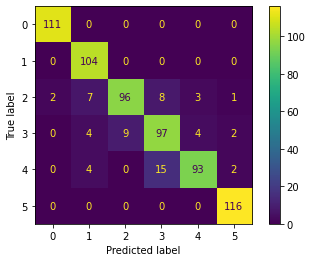

In [ ]:

rf = RandomForestClassifier(n_estimators=30,random_state=77)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test )
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  
 

### SVC

Accuracy: 0.8466076696165191
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99       111
            Dermatofibroma       0.85      0.94      0.89       104
Pigmented Benign Keratosis       0.80      0.70      0.75       117
             Solar Lentigo       0.64      0.70      0.67       116
           Vascular Lesion       0.91      0.75      0.82       114
               Lentigo Nos       0.93      1.00      0.96       116

                  accuracy                           0.85       678
                 macro avg       0.85      0.85      0.85       678
              weighted avg       0.85      0.85      0.85       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


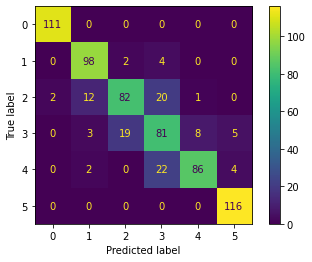

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
svc= SVC(gamma='auto',C=4.0,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.8938053097345132
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.87      1.00      0.93       103
            Dermatofibroma       0.90      0.89      0.89       108
Pigmented Benign Keratosis       0.90      0.81      0.85       112
             Solar Lentigo       0.78      0.90      0.83       119
           Vascular Lesion       0.99      0.78      0.87       121
               Lentigo Nos       0.97      1.00      0.98       115

                  accuracy                           0.89       678
                 macro avg       0.90      0.90      0.89       678
              weighted avg       0.90      0.89      0.89       678



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


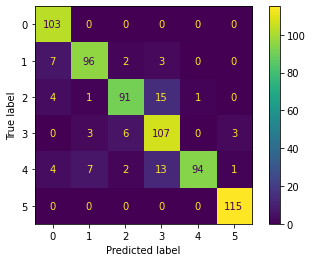

In [ ]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

 
predictions = dt.predict(X_test )
predictions=np.round(predictions)


target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.5693215339233039
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.83      0.90      0.86       111
            Dermatofibroma       0.62      0.23      0.34       104
Pigmented Benign Keratosis       0.50      0.63      0.56       117
             Solar Lentigo       0.26      0.23      0.25       116
           Vascular Lesion       0.56      0.46      0.50       114
               Lentigo Nos       0.63      0.94      0.75       116

                  accuracy                           0.57       678
                 macro avg       0.57      0.57      0.54       678
              weighted avg       0.56      0.57      0.54       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


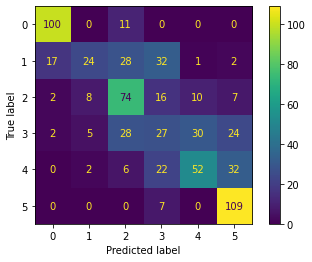

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)
# predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  



### Ensemble

Accuracy: 0.9601769911504425
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99       111
            Dermatofibroma       0.93      1.00      0.96       104
Pigmented Benign Keratosis       0.95      0.88      0.92       117
             Solar Lentigo       0.95      0.91      0.93       116
           Vascular Lesion       0.95      0.98      0.97       114
               Lentigo Nos       1.00      1.00      1.00       116

                  accuracy                           0.96       678
                 macro avg       0.96      0.96      0.96       678
              weighted avg       0.96      0.96      0.96       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


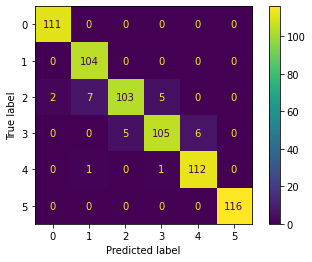

In [ ]:

clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
# predictions = eclf1.predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  

## **SegNet**

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Fiverr/2016_final/Classification/balanced_segnet.csv')
df=df.drop(columns=df.columns[0],axis=1)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,label
0,1.799622,-1.215559,1.089233,-0.587335,-0.355287,-0.761492,-0.948064,0.085310,-0.716309,0.306160,-0.400222,4
1,-0.677593,-0.755200,0.136602,-0.442495,-0.640951,0.129294,-0.307161,-0.903909,-0.539999,0.531035,0.465266,5
2,-0.785298,-0.563384,0.091239,-0.442495,-0.088667,-0.761492,0.030157,-1.503147,0.047699,-1.155532,0.937351,3
3,-0.031363,0.050427,0.045876,-0.007976,0.368396,1.712913,2.728698,0.660769,-1.010158,-0.930656,-1.265710,2
4,-0.516036,2.064494,-0.816028,0.354124,-0.069622,-0.860468,-0.880601,-0.390276,1.281866,-0.368467,0.386586,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,-0.623741,-0.103026,-1.133571,-0.732175,-0.336242,0.327246,0.131352,-0.485393,0.282779,-1.043094,-1.344391,1
3006,-1.000708,1.009506,-1.133571,-0.225236,-0.583818,1.811890,0.333743,-0.675628,1.164326,-0.593343,1.252074,4
3007,-1.862348,-0.601748,-0.180941,-0.442495,-0.564774,0.525199,0.401206,-2.340179,2.339723,0.418597,2.589647,5
3008,2.230442,-1.023743,1.996500,-0.297655,-0.336242,-0.761492,-0.307161,0.988923,-2.596943,0.868348,-0.714945,5


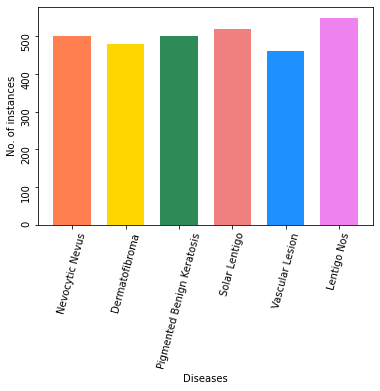

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Nevocytic Nevus':df.groupby('quality').size()[0], 'Dermatofibroma':df.groupby('quality').size()[1], 'Pigmented Benign Keratosis':df.groupby('quality').size()[2],
		'Solar Lentigo':df.groupby('quality').size()[3],'Vascular Lesion':df.groupby('quality').size()[4],'Lentigo Nos':df.groupby('quality').size()[5]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))

# creating the bar plot
plt.bar(courses, values, color =['coral','gold','seagreen','lightcoral','dodgerblue','violet'],
		width = 0.7)
plt.xticks(rotation=75)
plt.xlabel("Diseases")
plt.ylabel("No. of instances")
# plt.title("")
plt.yticks(  rotation='vertical')
plt.show()


In [ ]:
label_segnet=df['label']
df_segnet_final = df.drop('label', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_segnet_final, label_segnet ,
                                                    test_size=0.225, random_state=44)
print('Training on ',X_train.shape[0],' images')
print('Testing on ',X_test.shape[0],' images')

Training on  2332  images
Testing on  678  images


### Random Forest

Accuracy: 0.855457227138643
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.89      1.00      0.94       103
            Dermatofibroma       0.94      0.70      0.80       108
Pigmented Benign Keratosis       0.76      0.80      0.78       112
             Solar Lentigo       0.69      0.85      0.76       119
           Vascular Lesion       0.97      0.79      0.87       121
               Lentigo Nos       0.97      1.00      0.99       115

                  accuracy                           0.86       678
                 macro avg       0.87      0.86      0.86       678
              weighted avg       0.87      0.86      0.86       678



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


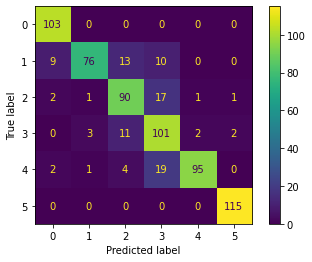

In [ ]:
rf = RandomForestClassifier(n_estimators=30,random_state=77)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(rf, X_test, y_test)  

### SVC

Accuracy: 0.827433628318584
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.97      1.00      0.98       111
            Dermatofibroma       0.84      0.93      0.89       104
Pigmented Benign Keratosis       0.77      0.70      0.74       117
             Solar Lentigo       0.62      0.62      0.62       116
           Vascular Lesion       0.86      0.73      0.79       114
               Lentigo Nos       0.89      1.00      0.94       116

                  accuracy                           0.83       678
                 macro avg       0.83      0.83      0.83       678
              weighted avg       0.83      0.83      0.82       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


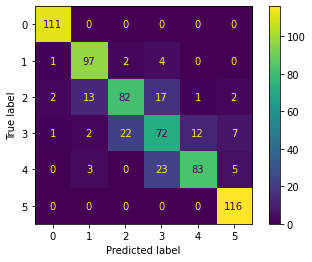

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
svc= SVC(gamma='auto',C=4.0,degree=5,kernel='rbf')
 
svc.fit(X_train, y_train)
predictions = svc.predict(X_test )
predictions=np.round(predictions)


target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(svc, X_test, y_test)  

### Decision Tree

Accuracy: 0.9085545722713865
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.98      1.00      0.99       111
            Dermatofibroma       0.87      1.00      0.93       104
Pigmented Benign Keratosis       0.91      0.82      0.86       117
             Solar Lentigo       0.81      0.83      0.82       116
           Vascular Lesion       0.92      0.82      0.87       114
               Lentigo Nos       0.96      1.00      0.98       116

                  accuracy                           0.91       678
                 macro avg       0.91      0.91      0.91       678
              weighted avg       0.91      0.91      0.91       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


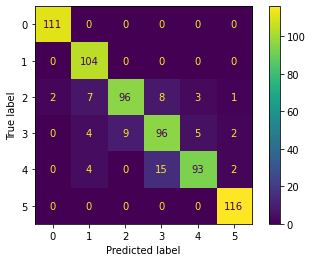

In [ ]:

from sklearn import tree
dt =  tree.DecisionTreeClassifier(random_state=0, max_depth=10)
predictions = dt.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(dt, X_test, y_test)  

### Naieve Bayes

Accuracy: 0.6061946902654868
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.78      1.00      0.88       111
            Dermatofibroma       0.55      0.52      0.53       104
Pigmented Benign Keratosis       0.55      0.63      0.59       117
             Solar Lentigo       0.38      0.23      0.29       116
           Vascular Lesion       0.57      0.25      0.35       114
               Lentigo Nos       0.64      1.00      0.78       116

                  accuracy                           0.61       678
                 macro avg       0.58      0.61      0.57       678
              weighted avg       0.58      0.61      0.57       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


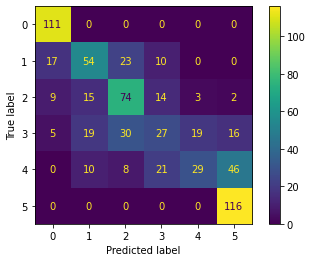

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
bounds = ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])

gnb =   GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
predictions=np.round(predictions)
# predictions=np.round(predictions)

target_names =['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(gnb, X_test, y_test)  


### Emsemble

Accuracy: 0.9306784660766961
                            precision    recall  f1-score   support

           Nevocytic Nevus       0.97      1.00      0.99       111
            Dermatofibroma       0.85      1.00      0.92       104
Pigmented Benign Keratosis       0.86      0.89      0.87       117
             Solar Lentigo       0.92      0.80      0.86       116
           Vascular Lesion       0.99      0.90      0.94       114
               Lentigo Nos       1.00      1.00      1.00       116

                  accuracy                           0.93       678
                 macro avg       0.93      0.93      0.93       678
              weighted avg       0.93      0.93      0.93       678



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


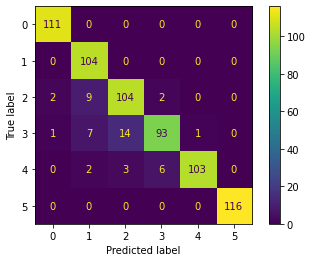

In [ ]:

clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf2 = RandomForestClassifier(n_estimators=30, random_state=77)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto',C=5.0,degree=5,kernel='rbf')

eclf1 = VotingClassifier(estimators=[
        ('dt', clf1), ('rf', clf2), ('gnb', clf3),('svc', clf4)], voting='hard')
predictions = eclf1.fit(X_train, y_train).predict(X_test)
# predictions = eclf1.predict(X_test)
predictions=np.round(predictions)

target_names = ['Nevocytic Nevus', 'Dermatofibroma', 'Pigmented Benign Keratosis', 'Solar Lentigo','Vascular Lesion','Lentigo Nos']
print ("Accuracy:", ms.accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions, target_names=target_names))
cf_matrix=plot_confusion_matrix(eclf1, X_test, y_test)  

### ---------------------------------------------------------------------------------------